# 집단/비집단 감염자의 비율 확인 
---  

### 개요  
- 이전까지 확인한 감염 케이스에서 집단/비집단 감염 케이스를 분석하기 위한 시각화 자료 
- 성별차가 감염에 원인이 되는지 확인했다

### 목차  
1. 데이터 로드
2. 집단/비집단 감염 데이터 가공
3. 집단/비집단 감염 시각화
4. 확진자 남녀 비율 데이터 가공
5. 확진자 남녀 비율 비교 그래프 생성

###     시각화  
- 집단/비집단 감염 케이스 

### 결론
- 전지역에서 그룹 전파로 감염된 확진자가 비그룹 전파보다 많음
- 확진자의 성별차에서는 큰 유의미한 관계를 발견할 수 없었음

### 개선사항
- 감염 케이스 데이터 자체에 널값이 많아서 신뢰성이 떨어짐. 다른 데이터를 찾으려고 했으나 감염 케이스 데이터를 찾을 수 없었다.
- 확진자 성별차에서 유의미한 관계는 없었지만, 유동인구/재직자 등의 데이터를 추가하여 분석해보면 다른 인사이트가 도출될것이라 생각함

---
## 1. 데이터 로드

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from pprint import pprint as pp

import folium 
from folium import plugins
from folium.plugins import HeatMap

In [2]:
df_Case = pd.read_csv('/home/seong/workspace/covid/Data/Case.csv')
df_Patient = pd.read_csv('/home/seong/workspace/covid/Data/PatientInfo.csv')
df_Region = pd.read_csv('/home/seong/workspace/covid/Data/Region.csv')

---
## 2. 집단/비집단 감염 데이터 가공

In [3]:
# notGroupCase는 그룹감염이 아닌 케이스들만 뽑은 데이터 프레임
# bigCase는 확진자수를 기준으로 내림차순으로 케이스를 정렬한 데이터 프레임

CaseOrder = df_Case.sort_values(by=['confirmed'], ascending=False)
CaseOrder.head()

notGroupCase = CaseOrder[CaseOrder.group == False]
#notGroupCase.head()

In [4]:
# gcArray는 비 집단 감염 케이스명을 담아놓은 배열
ngcArray = notGroupCase.infection_case.unique()
#ngcArray 

# ngcProvince는 지역을 담아놓은 배열
ngcProvince = df_Case.province.unique()
#ngcProvince 

In [5]:
# ngcProvince에 있는 지역을 하나씩 트래버스해서 그 지역과 같은 지역인 행들만 뽑아 데이터 프레임을 만듬
# 데이터 프레임에서 확진자 수를 뽑아서 sum에 더함
# sum은 그 케이스의 누적 확진자 수
# comfirmedList는 집단감염으로 감염된 누적 확진자 수를 집단별로 뽑은 것

comfirmedList=[]
for f in ngcProvince  :
    c = notGroupCase[notGroupCase.province == f]
    sum = 0
    for i in c.confirmed:
        sum += i 
        pass #
    comfirmedList.append(sum)
    print(f, " : ",sum)
    pass #


print(comfirmedList)

Seoul  :  560
Busan  :  85
Daegu  :  1705
Gwangju  :  29
Incheon  :  85
Daejeon  :  45
Ulsan  :  35
Sejong  :  9
Gyeonggi-do  :  452
Gangwon-do  :  23
Chungcheongbuk-do  :  32
Chungcheongnam-do  :  30
Jeollabuk-do  :  17
Jeollanam-do  :  22
Gyeongsangbuk-do  :  345
Gyeongsangnam-do  :  52
Jeju-do  :  18
[560, 85, 1705, 29, 85, 45, 35, 9, 452, 23, 32, 30, 17, 22, 345, 52, 18]


In [6]:
# 위의 정보를 테이블로 생성
notGroup_infection = pd.DataFrame(
    { 
    'Province' : ['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon',
       'Ulsan', 'Sejong', 'Gyeonggi-do', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'],
    'Confirmed':[560, 85, 1705, 29, 85, 45, 35, 9, 452, 23, 32, 30, 17, 22, 345, 52, 18]
    },
)

notGroup_infection 

,Province,Confirmed
0,Seoul,560
1,Busan,85
2,Daegu,1705
3,Gwangju,29
4,Incheon,85
5,Daejeon,45
6,Ulsan,35
7,Sejong,9
8,Gyeonggi-do,452
9,Gangwon-do,23


---
## 3. 집단/비집단 감염 시각화

<Figure size 2160x1440 with 0 Axes>

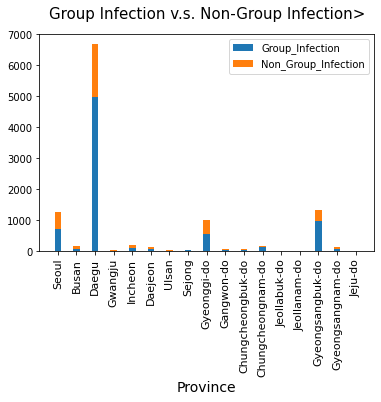

In [7]:
labels = ['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon',
       'Ulsan', 'Sejong', 'Gyeonggi-do', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do']
Group_Infection = [720, 71, 4975, 14, 117, 86, 16, 40, 548, 39, 28, 128, 6, 3, 979, 80, 1]
Non_Group_Infection = [560, 85, 1705, 29, 85, 45, 35, 9, 452, 23, 32, 30, 17, 22, 345, 52, 18]

width = 0.35
plt.figure(figsize = (30,20))
fig, grid = plt.subplots()

# grid.figure()
grid.bar(labels, Group_Infection, width,  label='Group_Infection')
grid.bar(labels, Non_Group_Infection, width, bottom=Group_Infection,
       label='Non_Group_Infection')

plt.xticks(rotation=90, fontsize=11)
grid.set_xlabel('Province', fontdict={'fontsize':14 })
grid.set_title('Group Infection v.s. Non-Group Infection>', fontsize = 15, pad = 15)
grid.legend()

plt.show()

---
## 4. 확진자 남녀 비율 데이터 가공

In [8]:
regional_patient = pd.merge(df_Patient[['patient_id','confirmed_date','sex','age','province','city']],
                   df_Region[['province','city','latitude','longitude']], 
                   how = 'left', on = ['province','city'])

#regional_patient.head()

In [9]:
#남녀 확진자 수 데이터 프레임
male_patient = regional_patient.query('sex in ("male")')[['latitude','longitude']].dropna()
female_patient = regional_patient.query('sex in ("female")')[['latitude','longitude']].dropna()

---
## 5. 확진자 남녀 비율 비교 그래프 생성

In [10]:
#지도 시각화
#하나의 지도에서 남/녀 레이아웃 설정으로 남/녀 확진자를 비교하여 볼 수 있는 옵션 추가

#지도 레이아웃 설정
m = folium.Map([36.5, 128], zoom_start=7, control_scale=True, tiles = 'Stamen Toner' )

#옵션 버튼 추사
plugins.Fullscreen(position='topright').add_to(m)
minimap = plugins.MiniMap(toggle_display=True)
m.add_child(minimap)


initial = folium.plugins.MarkerCluster(control=False)
m.add_child(initial)

#버튼에 데이터 추가
female_g = plugins.FeatureGroupSubGroup(initial, 'Female')
m.add_child(female_g)

male_g = plugins.FeatureGroupSubGroup(initial, 'Male') 
m.add_child(male_g)

#옵션에 데이터가 추가된 버튼을 추가
plugins.MarkerCluster(female_patient).add_to(female_g)
plugins.MarkerCluster(male_patient).add_to(male_g)

folium.LayerControl(collapsed=False).add_to(m)

m